In [1]:
'''
Preprocess the sky and star targets for the fiber assignment.
'''
from utils.common_imports import np, time, plt, fits, Table, new_colors
import pandas as pd

In [2]:
def get_data_table(id, ra, dec, prefix):
    '''
    Get the data table of the sky or star targets.
    '''
    if prefix is None:
        raise ValueError('Give prefix of data file!')
    
    # Create the data table
    id_list = ['_Sky_'+str(x) for x in id] if prefix == 'sky' else ['_Star_'+str(x) for x in id]
    data_table = Table(
        [
            np.array(id_list),  # ID
            np.array(ra, dtype='float64'),  # R.A.
            np.array(dec, dtype='float64'),  # Dec.
            np.zeros(len(ra), dtype='float64') + 900.0,  # Exposure Time
            np.zeros(len(ra), dtype='int32'),  # stage
        ],
        names=(
            'ID', 'R.A.', 'Dec.', 'Exposure Time', 'stage'
        )
    )

    return data_table

# TO-DO: same functin in preproc_data_cos.ipynb
def write_data(data_table, prefix, output_dir='../data_proc/', fmt='fits'):
    '''
    Write the calibration data into file that is ready for netflow.
    '''
    if prefix is None:
        raise ValueError('Give prefix (cos, sky, or star) of data file!')

    # Write the data table
    output_fn = output_dir + prefix + '_targets.' + fmt
    if fmt == 'fits':
        data_table.write(output_fn, format='fits', overwrite=True)
    elif fmt == 'ecsv':
        data_table.write(output_fn, format='ascii.ecsv', overwrite=True)
    else:
        raise ValueError('The format is not supported!')
    

def read_star_data(data_dir, region_id):
    '''
    Read the star data of a specific region.
    '''

    print(data_dir + f'/sky_star_data/region{region_id}_probfstar.csv')

    df_star = pd.read_csv(data_dir + f'/sky_star_data/region{region_id}_probfstar.csv') 

    return df_star


def read_sky_data(data_dir, region_id, split_id):
    '''
    Read the sky data of a specific region.
    '''
    df_sky = pd.read_feather(data_dir + f'/sky_star_data/sky_region{region_id}-0000{split_id}.feather')

    return df_sky


# TO-DO: same functin in preproc_data_cos.ipynb
def plot_radec(dt, title, save_fig=True, output_dir='../output/figures/'):
    '''
    Plot the ra-dec distribution of the data.
    '''
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.set_xlabel('RA [deg]')
    ax.set_ylabel('Dec [deg]')
    ax.set_title(title)
    
    ax.plot(dt['R.A.'], dt['Dec.'], ",", alpha=1., ls='none')

    if save_fig:
        fig.savefig(output_dir + title + '_radec.png')
    plt.show()
    
# TO-DO: def data_check() - check the data using plots and functions

In [3]:
# preprocess sky and star data
calib_data_dir = '/Users/jing/My_Work/Ongoing/NetFlow_PFS_Cosmo/Data/'

# TO-DO: revise the ra, dec region selection code
id_sky_test = np.array([])
ra_sky_test = np.array([])
dec_sky_test = np.array([])

# region 3 of sky data
t0 = time.time()

fig, ax= plt.subplots(1, 1, figsize=(6, 8))
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")
ax.set_title("Sky Region 3")

for i in range(4)[:2]:
    df_sky = read_sky_data(calib_data_dir, 3, i)
    if i == 0: print(df_sky.columns)
    
    # TO-DO: make sure sky_id is unique among all datasets
    id_sky = df_sky['sky_id']
    ra_sky = df_sky['ra']
    dec_sky = df_sky['dec']

    # mask if there is any
    msk = np.ones(len(id_sky), dtype=bool)
    # print the ra, dec range
    print("%f<ra<%f, %f<dec<%f." % (np.min(ra_sky), np.max(ra_sky), np.min(dec_sky), np.max(dec_sky)))
    msk_test = (ra_sky > 330) & (ra_sky < 350) & (dec_sky > -1.5) & (dec_sky < 0.5)

    # get the data table
    #data_table_sky = get_data_table(id_sky[msk], ra_sky[msk], dec_sky[msk], prefix='sky')

    # write the data
    #write_data(data_table_sky, prefix=f'sky_region3_0000{i}', fmt='fits')
    #write_data(data_table_sky, prefix=f'sky_region3_0000{i}', fmt='ecsv')
    
    # plot the data
    ax.plot(ra_sky, dec_sky, ",", alpha=1., ls='none')

    # for test run
    id_sky_test = np.append(id_sky_test, id_sky[msk_test])
    ra_sky_test = np.append(ra_sky_test, ra_sky[msk_test])
    dec_sky_test = np.append(dec_sky_test, dec_sky[msk_test])
    

fig.savefig("../output/figures/" + "sky_region3" + "_radec.png")
plt.close(fig)

t1 = time.time()
print(f'Time taken - read sky data: {t1-t0:.2f} seconds')


Index(['sky_id', 'obj_id', 'obj_id_orig', 'ra', 'dec', 'epoch', 'tract',
       'patch', 'target_type_id', 'input_catalog_id', 'mag_thresh', 'version',
       'created_at', 'updated_at'],
      dtype='object')
328.803740<ra<348.803739, -8.112674<dec<8.499279.
0.000002<ra<359.999998, -8.112730<dec<8.499093.
Time taken - read sky data: 10.98 seconds


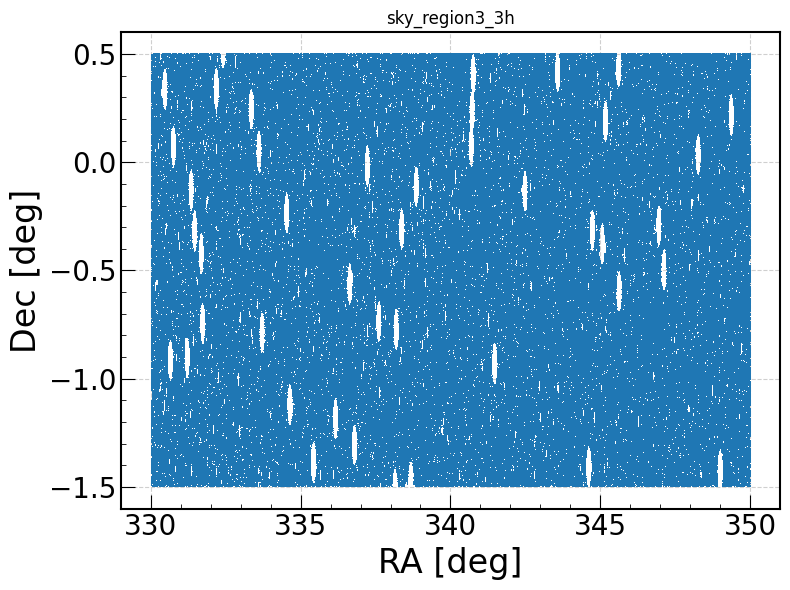

In [4]:
# for test run
data_table_sky_test = get_data_table(id_sky_test, ra_sky_test, dec_sky_test, prefix='sky')

write_data(data_table_sky_test, prefix=f'sky_region3_3h', fmt='ecsv', output_dir="../data_proc/test/")

plot_radec(data_table_sky_test, title="sky_region3_3h", output_dir='../output/figures/')

/Users/jing/My_Work/Ongoing/NetFlow_PFS_Cosmo/Data//sky_star_data/region3_probfstar.csv
Index(['obj_id', 'catalog', 'ra', 'dec', 'epoch', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'gPS1', 'rPS1', 'iPS1',
       'zPS1', 'yPS1', 'gFluxJy', 'rFluxJy', 'iFluxJy', 'zFluxJy', 'yFluxJy',
       'gFluxJy_err', 'rFluxJy_err', 'iFluxJy_err', 'zFluxJy_err',
       'yFluxJy_err', 'flags_dist', 'flags_ebv', 'probfstar'],
      dtype='object')
Time taken - read star data: 17.65 seconds
Time taken - get star table: 0.10 seconds
Time taken - save star table: 0.18 seconds


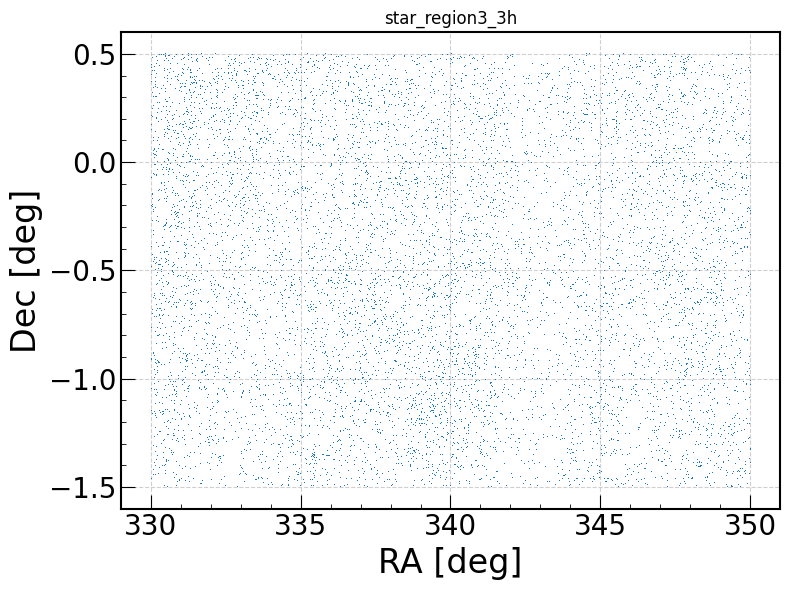

In [6]:
# region 3 of star data
t0 = time.time()

df_star = read_star_data(calib_data_dir, 3)
print(df_star.columns)

ra_star = df_star['ra']
dec_star = df_star['dec']
id_star = df_star['obj_id']
prob_star = df_star['probfstar']
iPS1 = df_star['iPS1']

t1 = time.time()
print(f'Time taken - read star data: {t1-t0:.2f} seconds')

# mask if there is any
# TO-DO: revise the ra, dec range later
msk =(iPS1>18) & (prob_star>0.5) & (ra_star>330) & (ra_star<350) & (dec_star>-1.5) & (dec_star<0.5)

# get the data table
data_table_star = get_data_table(id_star[msk], ra_star[msk], dec_star[msk], prefix='star')

t2 = time.time()
print(f'Time taken - get star table: {t2-t1:.2f} seconds')

# write the data
write_data(data_table_star, prefix=f'star_region3_3h', fmt='fits', output_dir='../data_proc/test/')
write_data(data_table_star, prefix=f'star_region3_3h', fmt='ecsv', output_dir='../data_proc/test/')

t3= time.time()
print(f'Time taken - save star table: {t3-t2:.2f} seconds')

# plot the data
plot_radec(data_table_star, title="star_region3_3h", output_dir='../output/figures/')

epoch of star is  [2016.]


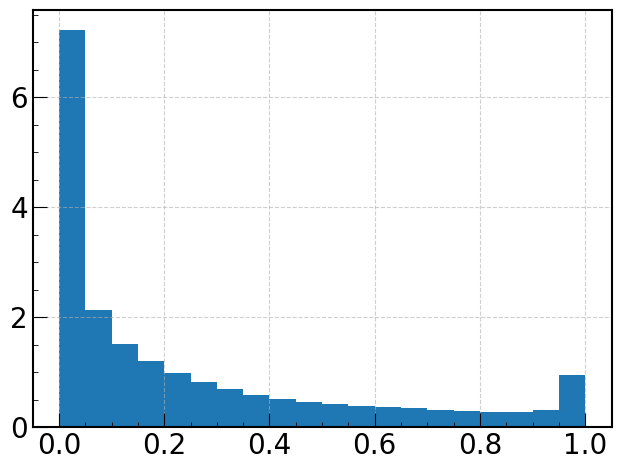

In [11]:
# check the data
print("epoch of star is ", np.unique(df_star['epoch']))
plt.hist(df_star['probfstar'], bins=20, density=True)
plt.show()
plt.close()